# Objective

Text Clustering will help understand how much weight is hold by texts in the Images. 
Here we would be trying to see how the Classes defined and Predicted Classes are perfoming.
1. Does text in defined classes create clusters if we plot them ?
2. If we try unsupervised approach, how the clusters are getting created for predicted classes.

# Imports

In [1]:
import os
from pathlib import Path
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import glob

In [2]:
directory = Path(os.path.abspath('')).parents[0]
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")
temp_data_dir = os.path.join(directory,"data/temp")
processed_data_dir = os.path.join(directory,"data/processed")
output_folder_dir = os.path.join(directory,"data/temp")


datasets_data_dir = os.path.join(directory,"data/datasets")

data_df = pd.read_csv(datasets_data_dir+"/text_keywords_data.csv")

# Text Clustering

In [3]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [4]:
text_body = data_df[['text_body']]
text_body

,text_body
0,nairo .Bis NBIFO Institut fiir biologische For...
1,Aqua L Risa.2 3048.Ro.SMEy.PHILIP MORRIS.U.S.A...
2,fa Re fer pos.CG.NOC.Ne.sR.jae.R.J. REYNOLDS T...
3,c.0.P.TY.Dr. Murco HN. Roegholt.Baarn 2h957.ca...
4,in.GALLAHER LIMITED.nO aaa.g HINGEWAY LONDON W...
...,...
995,got.we wes.FROM THE OFFICE OF U.S. SENATOFP.WA...
996,JOC L403 070.WELLS RICH GREENE IN CANADA .Well...
997,y.Institute. hits b.acks .Nat curbs Smoking re...
998,The Arizona RepublicTHE PHOENIX GAZETTE . Wed ...


In [5]:

text_arr = data_df[['text_body']].stack().tolist()
len(text_arr)

1000

In [6]:
# Creating Word Tokens for ngrams
words = []
for ii in range(0,len(text_body)):
    words.append(str(text_body.iloc[ii]['text_body']).split(" "))


# Extracting Ngrams for the text_bodeky
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

n_gram_all[0][0]

'nairo.Bis'

## Creating Embeding

In [7]:
# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

X = X.toarray()
X.shape

(1000, 4096)

In [8]:
tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.464745
[t-SNE] KL divergence after 1000 iterations: 0.477868


<h2>Elbow Method</h2>

In [9]:
import plotly.express as px
import plotly.graph_objects as go

wcss = []
cluster_range= 20
clusters = [i for i in range(0,cluster_range)]
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 100, n_init = 10, random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = go.Figure(data = go.Scatter(x = clusters, y = wcss))


fig.update_layout(title='Knee ELbow Method',
                   xaxis_title='Clusters',
                   yaxis_title='WCSS')
fig.show()

In [10]:
k = 16
kmeans = KMeans(n_clusters=k, verbose=10,init="k-means++", max_iter = 100, n_init = 10, random_state = 123)
y_pred = kmeans.fit_predict(X)

Initialization complete
Iteration 0, inertia 1856.826577438232.
Iteration 1, inertia 953.5360402716069.
Iteration 2, inertia 952.8777346655357.
Iteration 3, inertia 952.8025827754375.
Iteration 4, inertia 952.7826193031754.
Iteration 5, inertia 952.7656072613986.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1863.951296160341.
Iteration 1, inertia 954.6716520306118.
Iteration 2, inertia 954.1555067510728.
Iteration 3, inertia 953.6870757230274.
Iteration 4, inertia 953.5348634502765.
Iteration 5, inertia 953.5199290000514.
Iteration 6, inertia 953.5046972242534.
Iteration 7, inertia 953.4900061107519.
Iteration 8, inertia 953.4752791313047.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 963.0.
Iteration 1, inertia 959.576056856014.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1868.0923714982205.
Iteration 1, inertia 955.8667092823383.
Iteration 2, inert

In [11]:
y_train = y_pred
y_test = kmeans.predict(X)


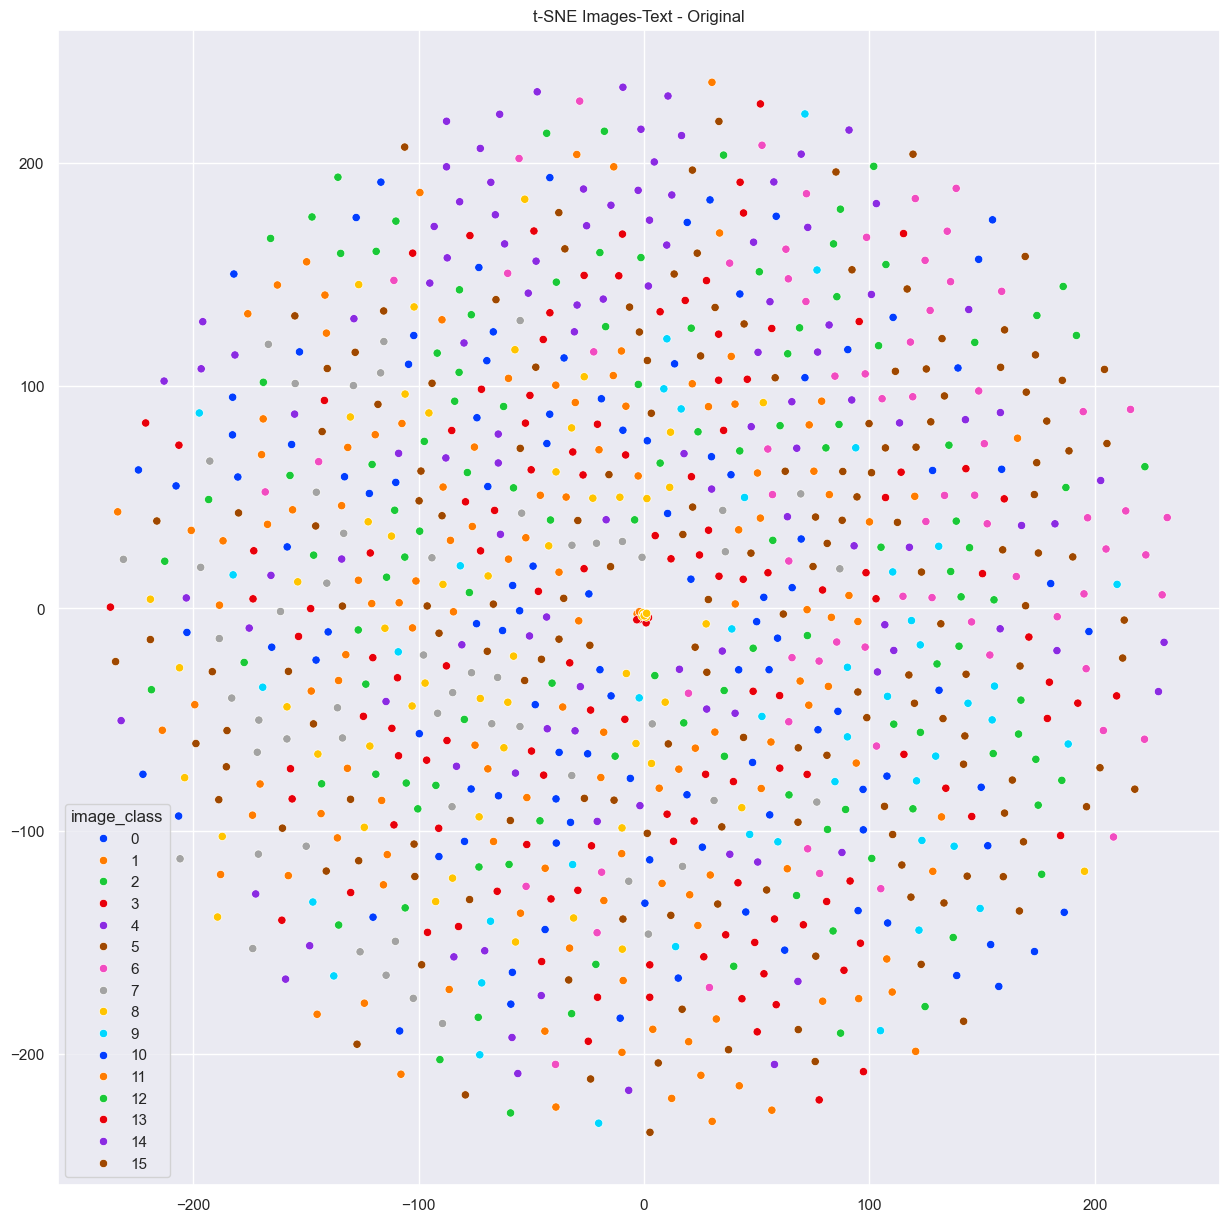

In [19]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(x= X_embedded[:,0],y= X_embedded[:,1], hue=data_df['image_class'], palette=palette)
plt.title("t-SNE Images-Text - Original")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

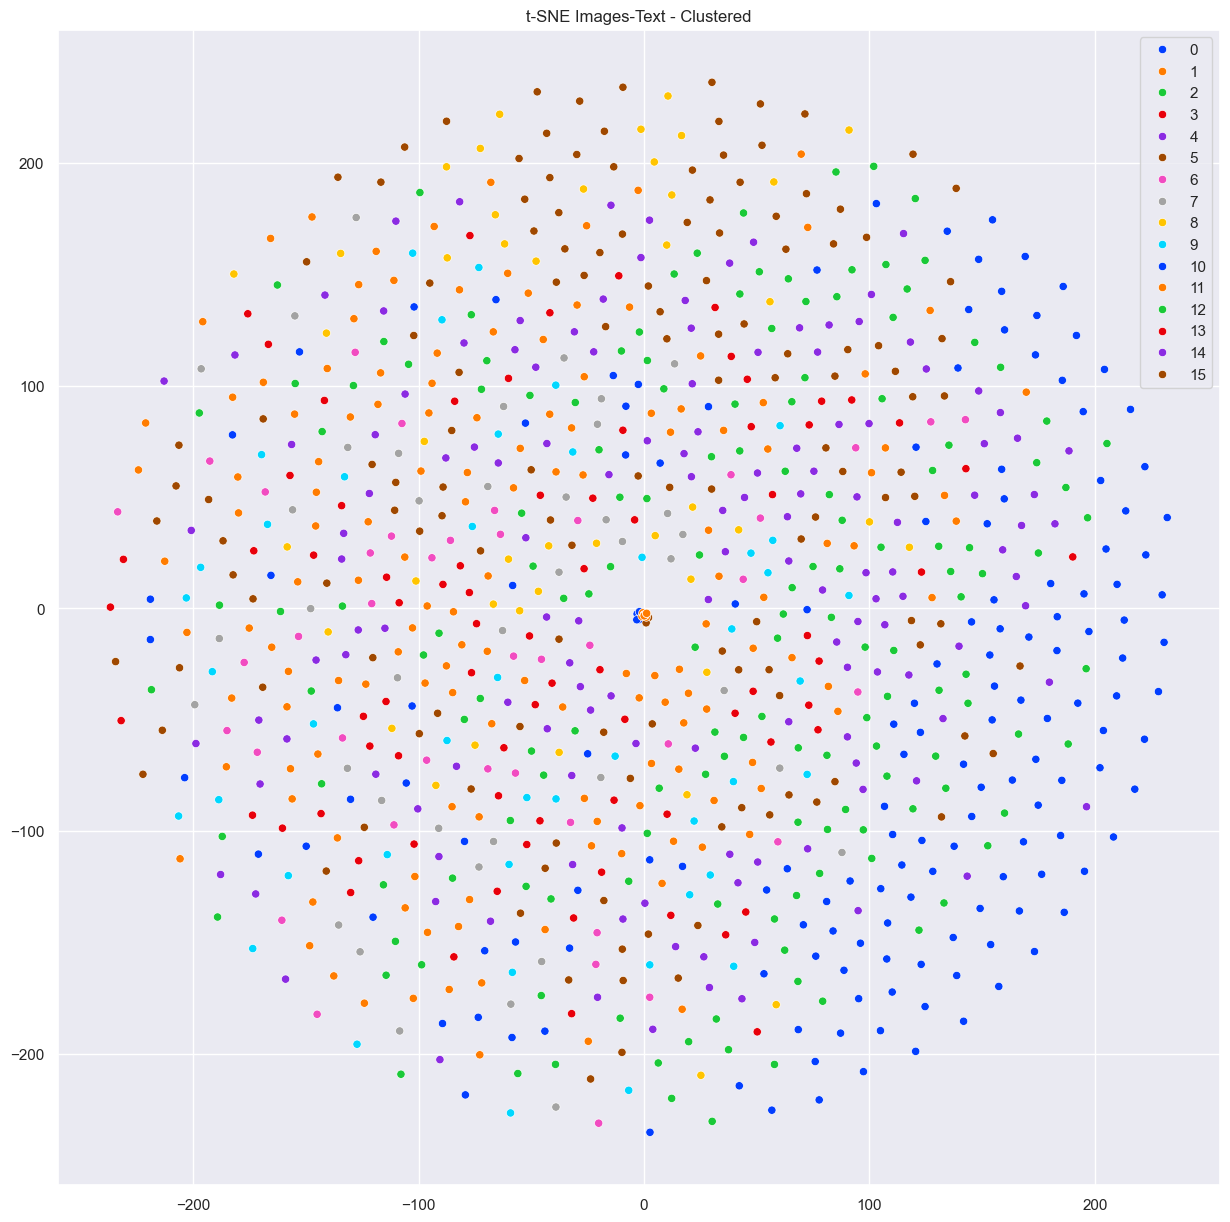

In [12]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(x= X_embedded[:,0],y= X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Images-Text - Clustered")
#plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

In [13]:
data_df

,image,image_class,text,text_body,entites,keywords
0,image_0794.png,0,nairo |.Bis {NBIFO Institut fiir biologische F...,nairo .Bis NBIFO Institut fiir biologische For...,"{'nairo': 'GPE', 'Dresdner Bank AG': 'ORG', 'T...","['NBIFO Institut fiir', 'fiir biologische Fors..."
1,image_0757.png,0,Aqua L “Risa.2} 30/48.Ro).SMEy.PHILIP MORRIS.‘...,Aqua L Risa.2 3048.Ro.SMEy.PHILIP MORRIS.U.S.A...,"{'NEW YORK': 'GPE', 'N.Y': 'GPE', 'May & Speh,...","['proprietary and confidential', 'Marketing an..."
2,image_0395.png,0,fa) Re fer pos.CG.NOC.Ne.(sR).jae.R.J. REYNOLD...,fa Re fer pos.CG.NOC.Ne.sR.jae.R.J. REYNOLDS T...,{'R.J. REYNOLDS TOBACCO COMPANY.WINSTON': 'ORG...,"['retailers and vendors', 'WINSTON SUPER KING'..."
3,image_0427.png,0,c.0.P.TY.Dr. Murco HN. Roegholt.Baarn 2h<9+57....,c.0.P.TY.Dr. Murco HN. Roegholt.Baarn 2h957.ca...,"{'the Netherlands).To': 'GPE', 'Medical Colleg...","['cigarette-butts of cigarettes', 'Negus.Direc..."
4,image_0552.png,0,in.GALLAHER LIMITED.nO aaa.g HINGEWAY + LONDON...,in.GALLAHER LIMITED.nO aaa.g HINGEWAY LONDON W...,"{'GALLAHER LIMITED.nO': 'ORG', 'LONDON': 'GPE'...","['loos of Inporial', 'vious of tho.Leet', 'Con..."
...,...,...,...,...,...,...
995,image_0837.png,9,got.we wes.FROM THE OFFICE OF U.S. SENATOFP.WA...,got.we wes.FROM THE OFFICE OF U.S. SENATOFP.WA...,"{'WASHINGTON': 'GPE', 'D.C.': 'GPE', 'FTC': 'O...","['SENATE OFFICE BUILDING', 'OFFICE BUILDING', ..."
996,image_0189.png,9,"JOC L403 070.“>.‘WELLS, RICH, GREENE IN CANADA...",JOC L403 070.WELLS RICH GREENE IN CANADA .Well...,"{'RICH': 'GPE', 'GREENE': 'GPE', 'CANADA': 'GP...","['idiste tat MeCanw', 'Canal whith', 'Welly Ri..."
997,image_0764.png,9,y.Institute.¥ hits b:.acks . *.Nat curbs = | S...,y.Institute. hits b.acks .Nat curbs Smoking re...,"{'SOSH': 'ORG', 'COSH': 'ORG', 'the ody ich ad...","['eon a aes.Fe', 'PAE Zotac laine', 'ELE scant..."
998,image_0994.png,9,The Arizona Republic/THE PHOENIX GAZETTE . Wed...,The Arizona RepublicTHE PHOENIX GAZETTE . Wed ...,"{'The Arizona Republic': 'ORG', 'We': 'GPE', '...","['smells and stinks', 'stinks and water.UG', '..."


In [14]:
fig = px.scatter(data_df, x= X_embedded[:,0],y= X_embedded[:,1], 
              color= 'image_class', opacity = 0.8 , size_max=50)
fig.show()

In [15]:
fig = px.scatter(data_df, x= X_embedded[:,0],y= X_embedded[:,1], 
              color= y_pred, opacity = 0.8 , size_max=50)
fig.show()

## Summary

